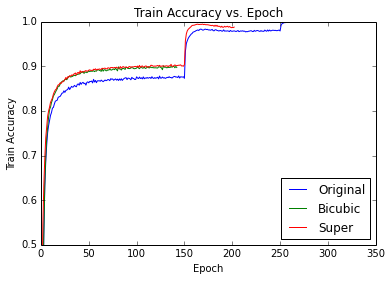

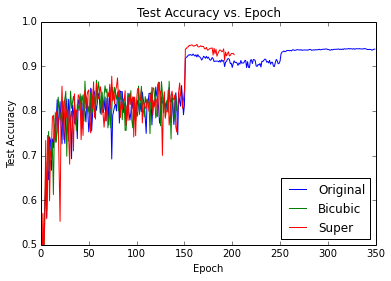

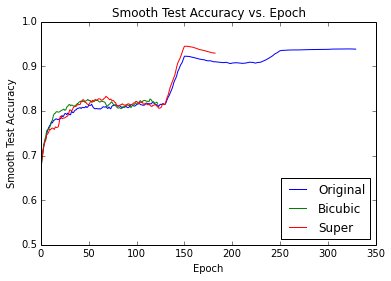

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import json

reg_file = "regular_stats2.json"
sup_file = "super_stats2.json"
bic_file = "bicubic_stats2.json"
with open(reg_file, 'r') as fp:
    reg_dict = json.load(fp)
with open(sup_file, 'r') as fp:
    sup_dict = json.load(fp)
with open(bic_file, 'r') as fp:
    bic_dict = json.load(fp)

def moving_avg(data, run=20):
    avg_list = []
    for i in range(run, len(data)):
        tot = 0.0
        for j in range(run):
            tot += data[i-j]
        avg = tot/run
        avg_list.append(avg)
    return avg_list
   
plt.figure()
plt.title("Train Accuracy vs. Epoch")
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.axis([0, 350, 0.5, 1.0])
plt.plot(reg_dict["train"], color='blue', label='Original')
plt.plot(bic_dict["train"], color='green', label='Bicubic')
plt.plot(sup_dict["train"], color='red', label='Super')
plt.legend(loc='lower right')
plt.figure()
plt.title("Test Accuracy vs. Epoch")
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.axis([0, 350, 0.5, 1.0])
plt.plot(reg_dict["test"], color='blue', label='Original')
plt.plot(bic_dict["test"], color='green', label='Bicubic')
plt.plot(sup_dict["test"], color='red', label='Super')
plt.legend(loc='lower right')
plt.figure()
plt.title("Smooth Test Accuracy vs. Epoch")
plt.xlabel('Epoch')
plt.ylabel('Smooth Test Accuracy')
plt.axis([0, 350, 0.5, 1.0])
plt.plot(moving_avg(reg_dict["test"]), color='blue', label='Original')
plt.plot(moving_avg(bic_dict["test"]), color='green', label='Bicubic')
plt.plot(moving_avg(sup_dict["test"]), color='red', label='Super')
plt.legend(loc='lower right')
plt.show()